# DA Final project:

# Group 31

# World University Ranking 2016-2024

###  Name of students:
Shir Berholz <br>
Noam Meiri <br>
Shani Landau <br>



<a id='top'></a>

<div>
<img src="https://github.com/shirberholz/graduation-img/blob/main/graduation%20imj.jpg?raw=true" width="800"/>
</div>





<b id="Top"> </b>  

1.[Introduction](#1) </br>
2. [Relevant libraries](#2) </br>
3.[Information on the data](#3) </br>
4.[ Wrangling data](#4)  
5. [Heatmap correlation](#5)</br>
6. [Conclusion 1: Women to Men Ratio](#6)</br>
7. [Conclusion 2: Ivy League](#7)</br>
8. [Conclusion 3: Universities in Israel](#8)</br>

<a id="1"> </a> 

 #### 1.Introduction
In this project, we will explore the rankings of universities worldwide. We will aim to discover interesting and surprising findings, and understand the differences between various universities around the world, particularly in Israel.

<a id="2"> </a> 

 #### 2. Relevant libraries

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install geopandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
from IPython.display import Image
import geopandas as gpd
from matplotlib.colors import Normalize
from wordcloud import WordCloud
import warnings

<a id="3"> </a> 
#### 3.Information on the data
The information presented in this project is sourced from the website [Kaggle](https://www.kaggle.com/datasets/raymondtoo/the-world-university-rankings-2016-2024)  
The information on the website is based on data from [The global university ranking site](https://www.timeshighereducation.com/world-university-rankings/ariel-university)

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/shirberholz/final/main/final%202016-2024.csv', encoding = 'latin-1')

In [6]:
data.reset_index(drop= True, inplace= True)

In [7]:
data.columns

Index(['Rank', 'Name', 'Country', 'Student Population',
       'Students to Staff Ratio', 'International Students',
       'Female to Male Ratio', 'Overall Score', 'Teaching',
       'Research Environment', 'Research Quality', 'Industry Impact',
       'International Outlook', 'Year'],
      dtype='object')

In [8]:
data.dtypes

Rank                         int64
Name                        object
Country                     object
Student Population           int64
Students to Staff Ratio    float64
International Students      object
Female to Male Ratio        object
Overall Score              float64
Teaching                   float64
Research Environment       float64
Research Quality           float64
Industry Impact            float64
International Outlook      float64
Year                         int64
dtype: object

In [9]:
data.shape

(12430, 14)

In [10]:
data.head()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
0,1,California Institute of Technology,United States,2243,6.9,26%,33 : 67,95.2,95.6,97.6,99.8,97.8,64.0,2016
1,2,University of Oxford,United Kingdom,19920,11.6,34%,46:54:00,94.2,86.5,98.9,98.8,73.1,94.4,2016
2,3,Stanford University,United States,15596,7.8,22%,42:58:00,93.9,92.5,96.2,99.9,63.3,76.3,2016
3,4,University of Cambridge,United Kingdom,18810,11.8,34%,46:54:00,92.8,88.2,96.7,97.0,55.0,91.5,2016
4,5,Massachusetts Institute of Technology,United States,11074,9.0,33%,37 : 63,92.0,89.4,88.6,99.7,95.4,84.0,2016



<a id="4"> </a> 
###  4.Wrangling data

We will look for outliers in the dataset, such as years not between 2016-2024 or rankings not between 0-100.

In [11]:

warnings.filterwarnings("ignore", message="The figure layout has changed to tight")


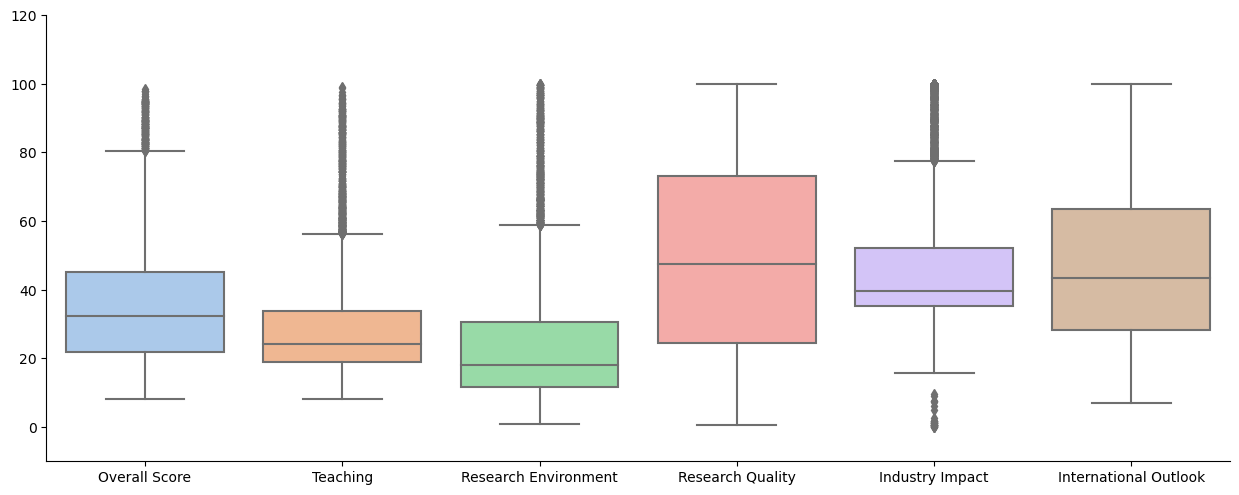

In [12]:
columns_of_interest = ["Overall Score", "Teaching", "Research Environment", "Research Quality", "Industry Impact", "International Outlook"]
Reasonable_Range = data.filter(columns_of_interest).select_dtypes(include=np.number)

sns.set_palette("pastel")
sns.catplot(data=Reasonable_Range, kind='box', aspect=2.5)
plt.ylim(-10, 120)  # Set the y-axis limit to 0-120
plt.subplots_adjust(wspace=0.5)
plt.show()

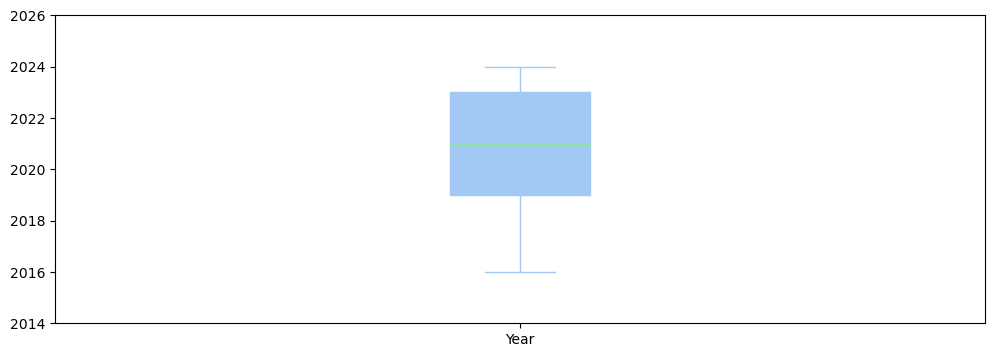

In [13]:
columns_of_interest = ["Year"]
Reasonable_Range= data.filter(columns_of_interest).select_dtypes(include=np.number)
sns.set_palette("pastel")
Reasonable_Range.plot(subplots=True, layout=(1, len(columns_of_interest)), kind='box', figsize=(12, 4), patch_artist=True)
plt.ylim(2014, 2026)
plt.show()

It can be observed that all the data complies with the defined criteria.

 We will check for any missing data. For all missing values in the female-to-male ratio, we will enter the number -3 to easily filter them out during calculations and avoid distortion (since the number of people cannot be negative).

In [14]:
data.isnull().sum()

Rank                         0
Name                         0
Country                      0
Student Population           0
Students to Staff Ratio      0
International Students       0
Female to Male Ratio       591
Overall Score                0
Teaching                     0
Research Environment         0
Research Quality             0
Industry Impact              0
International Outlook        0
Year                         0
dtype: int64

In [15]:
data['Female to Male Ratio'].fillna('-3:-3', inplace=True) #-3 in order to not harm the average
data.isnull().sum()

Rank                       0
Name                       0
Country                    0
Student Population         0
Students to Staff Ratio    0
International Students     0
Female to Male Ratio       0
Overall Score              0
Teaching                   0
Research Environment       0
Research Quality           0
Industry Impact            0
International Outlook      0
Year                       0
dtype: int64

To work with the percentage of international students column, we will remove the percentage sign (%) from the data and convert it to numerical values.

In [16]:
data['International Students'] = data['International Students'].str.replace('%', '')

In [17]:
data['International Students'] = pd.to_numeric(data['International Students'])
data.head()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
0,1,California Institute of Technology,United States,2243,6.9,26.0,33 : 67,95.2,95.6,97.6,99.8,97.8,64.0,2016
1,2,University of Oxford,United Kingdom,19920,11.6,34.0,46:54:00,94.2,86.5,98.9,98.8,73.1,94.4,2016
2,3,Stanford University,United States,15596,7.8,22.0,42:58:00,93.9,92.5,96.2,99.9,63.3,76.3,2016
3,4,University of Cambridge,United Kingdom,18810,11.8,34.0,46:54:00,92.8,88.2,96.7,97.0,55.0,91.5,2016
4,5,Massachusetts Institute of Technology,United States,11074,9.0,33.0,37 : 63,92.0,89.4,88.6,99.7,95.4,84.0,2016


To use the female-to-male ratio, we will create two new columns and calculate the numeric values for the female ratio and the male ratio separately.

In [18]:
data['Female to Male Ratio'] = data['Female to Male Ratio'].astype(str)

In [19]:
data['Female to Male Ratio'] = data['Female to Male Ratio'].str.replace(':00', '')  # Remove the extra colon and zeros
data[['Female Ratio', 'Male Ratio']] = data['Female to Male Ratio'].str.split(':', expand=True)#Splits into two different columns
data[['Female Ratio', 'Male Ratio']]

,Female Ratio,Male Ratio
0,33,67
1,46,54
2,42,58
3,46,54
4,37,63
...,...,...
12425,56,44
12426,50,50
12427,49,51
12428,66,34


We will create a new column that contains the numeric value of the ratio.

In [20]:
data['Male Ratio'] = pd.to_numeric(data['Male Ratio'], errors='coerce') 
data['Female Ratio'] = pd.to_numeric(data['Female Ratio'], errors='coerce')
data['Female to Male numeric Ratio'] = np.where((data['Female Ratio'] == -3) | (data['Male Ratio'] == -3), -1, data['Female Ratio'] / data['Male Ratio'])# Calculate 'Female to Male numeric Ratio', setting -1 when 'Female Ratio' or 'Male Ratio' is -3
filtered_data = data[data['Female to Male numeric Ratio'] != -1] # Filter out rows where 'Female to Male numeric Ratio' is -1


We will create a set that contains the country name and the average female-to-male ratio for universities in that country.

In [21]:
average_ratio_by_country = filtered_data.groupby('Country')['Female to Male numeric Ratio'].mean().reset_index()
average_ratio_by_country.columns = ['Country', 'Average Female to Male numeric Ratio']
average_ratio_by_country.head()


,Country,Average Female to Male numeric Ratio
0,Algeria,1.612381
1,Argentina,1.708820
2,Armenia,1.127660
3,Australia,1.355388
4,Austria,1.225541



<a id="5"> </a> 
###  5.Heatmap correlation


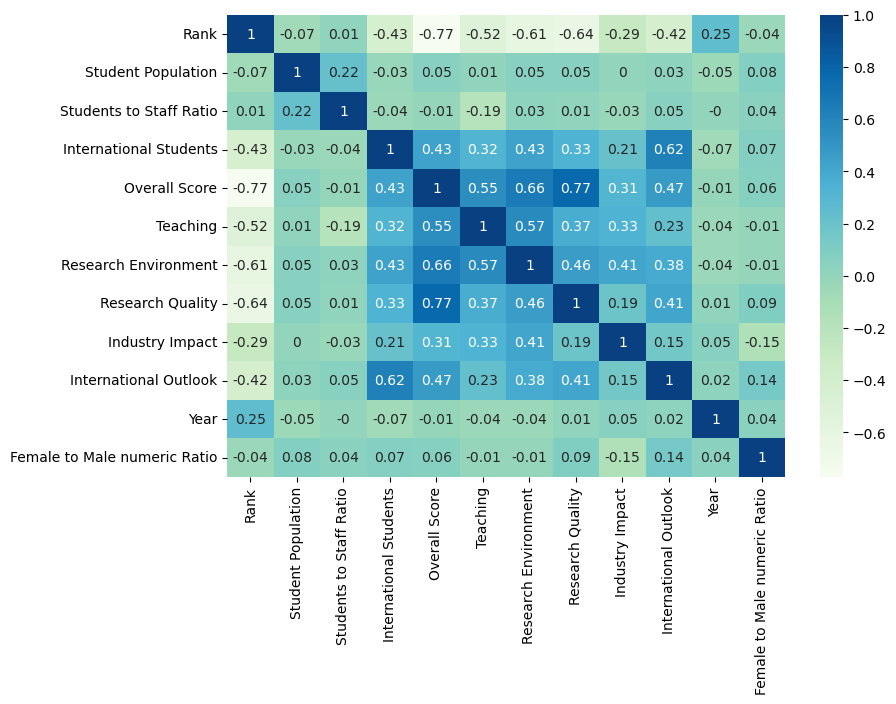

In [22]:
filtered_data_without_negatives = filtered_data[filtered_data['Female to Male numeric Ratio'] != -1]
features = ['Rank', 'Student Population', 'Students to Staff Ratio', 'International Students','Overall Score', 'Teaching', 'Research Environment', 'Research Quality', 'Industry Impact', 'International Outlook', 'Year', 'Female to Male numeric Ratio']
correlations = filtered_data_without_negatives[features].corr(method='kendall').round(2)
plt.figure(figsize=(9, 6))
sns.heatmap(data=correlations, cmap='GnBu', annot=True)
plt.show()

 It can be observed that there is a strong correlation between the final score and research quality. We can infer that research quality is the main factor influencing the final score. Additionally, there is a strong correlation between attracting international students and faculty and the percentage of international students. This conclusion is intuitive, as universities that attract external students and staff will naturally have a higher percentage of international students.


<a id="6"> </a> 
###  6.Conclusion 1: Women to Men Ratio

We will compare the female-to-male ratios among universities worldwide. 

- Countries with a higher number of women (ratio greater than 1) will be colored in a stronger shade of red.
- Countries with a higher number of men (ratio less than 1) will be colored in a stronger shade of blue.
- Countries where the ratio is approximately equal (ratio close to 1) will be colored in gray.

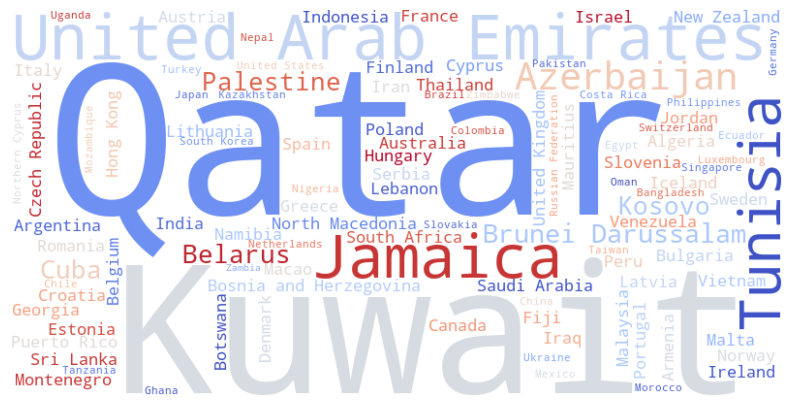

In [23]:
ratio_dict = dict(zip(average_ratio_by_country['Country'], average_ratio_by_country['Average Female to Male numeric Ratio']))
norm = Normalize(vmin=0, vmax=2) # Normalize the values to be between 0 and 2 
normed_ratios = {country: norm(value) for country, value in ratio_dict.items()}
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm', min_font_size=10)# Generate word cloud
wordcloud.generate_from_frequencies(normed_ratios)
plt.figure(figsize=(10, 6))# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We will review the spelling of the country names in our file and check that all countries are spelled consistently with the list of countries from The 
[UN](https://unstats.un.org/unsd/methodology/m49/)

In [24]:
countries_list = ['Afghanistan', 'Åland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla','Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan','Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium','Belize', 'Benin', 'Bermuda', 'Bhutan','Bolivia (Plurinational State of)', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana','Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'British Virgin Islands', 'Brunei Darussalam','Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands','Central African Republic', 'Chad', 'Chile', 'China', 'China, Hong Kong Special Administrative Region','China, Macao Special Administrative Region', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia','Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Côte d’Ivoire', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus','Czechia', 'Democratic People\'s Republic of Korea', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti','Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia','Eswatini', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France','French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany','Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea','Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See', 'Honduras', 'Hungary','Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy','Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan','Lao People\'s Democratic Republic', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein','Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands','Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia (Federated States of)', 'Monaco','Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal','Netherlands (Kingdom of the)', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue','Norfolk Island', 'North Macedonia', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama','Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar','Republic of Korea', 'Republic of Moldova', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda','Saint Barthélemy', 'Saint Helena', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French Part)','Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe','Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)','Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands','South Sudan', 'Spain', 'Sri Lanka', 'State of Palestine', 'Sudan', 'Suriname', 'Svalbard and Jan Mayen Islands','Sweden', 'Switzerland', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau','Tonga', 'Trinidad and Tobago', 'Tunisia', 'Türkiye', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu','Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland','United Republic of Tanzania', 'United States Minor Outlying Islands', 'United States of America','United States Virgin Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)', 'Viet Nam','Wallis and Futuna Islands', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe']
countries_in_data_set = set(average_ratio_by_country['Country'])
countries_set = set(countries_list)
missing_countries = countries_in_data_set - countries_set  # Find countries that are in the dataset but not in the list
print('\n'.join(missing_countries))

Palestine
United Kingdom
United States
Turkey
Tanzania
Venezuela
Kosovo
Vietnam
Iran
Macao
Northern Cyprus
Czech Republic
South Korea
Hong Kong
Taiwan
Netherlands


In [25]:
average_ratio_by_country['Country'] = average_ratio_by_country['Country'].replace('United States', 'United States of America')
average_ratio_by_country['Country'] = average_ratio_by_country['Country'].replace('Tanzania', 'United Republic of Tanzania')
average_ratio_by_country['Country'] = average_ratio_by_country['Country'].replace('Czech Republic', 'Czechia')
average_ratio_by_country['Country'] = average_ratio_by_country['Country'].replace('Macao', 'China, Macao Special Administrative Region')
average_ratio_by_country['Country'] = average_ratio_by_country['Country'].replace('Kosovo', 'Serbia')
average_ratio_by_country['Country'] = average_ratio_by_country['Country'].replace('Netherlands', 'Netherlands (Kingdom of the)')
average_ratio_by_country['Country'] = average_ratio_by_country['Country'].replace('Hong Kong', 'China, Hong Kong Special Administrative Region')
average_ratio_by_country['Country'] = average_ratio_by_country['Country'].replace('Northern Cyprus', 'Cyprus')
average_ratio_by_country['Country'] = average_ratio_by_country['Country'].replace('Venezuela', 'Venezuela (Bolivarian Republic of)')
average_ratio_by_country['Country'] = average_ratio_by_country['Country'].replace('Taiwan', 'China')
average_ratio_by_country['Country'] = average_ratio_by_country['Country'].replace('United Kingdom', 'United Kingdom of Great Britain and Northern Ireland')
average_ratio_by_country['Country'] = average_ratio_by_country['Country'].replace('Vietnam', 'Viet Nam')
average_ratio_by_country['Country'] = average_ratio_by_country['Country'].replace('Iran', 'Iran (Islamic Republic of)')
average_ratio_by_country['Country'] = average_ratio_by_country['Country'].replace('Turkey', 'Türkiye')
average_ratio_by_country['Country'] = average_ratio_by_country['Country'].replace('South Korea', 'Republic of Korea')

average_ratio_by_country

,Country,Average Female to Male numeric Ratio
0,Algeria,1.612381
1,Argentina,1.708820
2,Armenia,1.127660
3,Australia,1.355388
4,Austria,1.225541
...,...,...
103,United States of America,1.125388
104,Venezuela (Bolivarian Republic of),1.258838
105,Viet Nam,1.180907
106,Zambia,0.588903


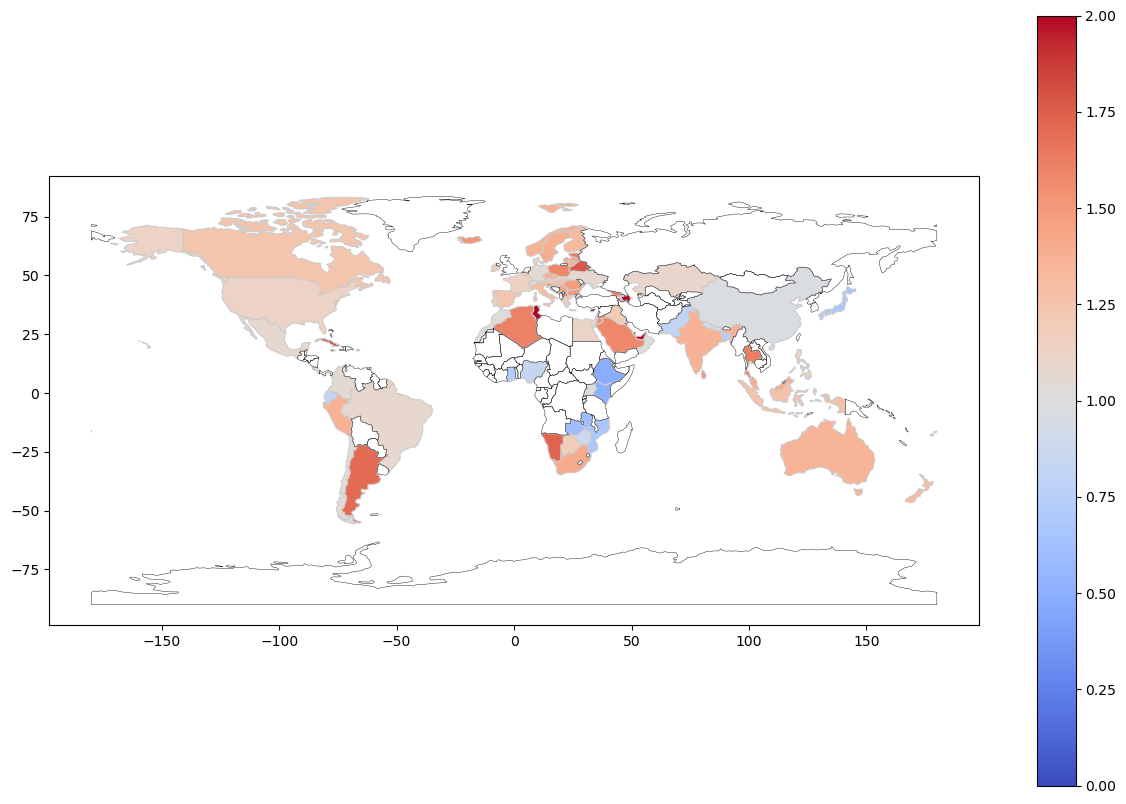

In [26]:
warnings.simplefilter(action='ignore', category=FutureWarning)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(average_ratio_by_country, left_on='name', right_on='Country')# Merge data with world map
cmap = 'coolwarm'
norm = Normalize(vmin=-0, vmax=2.0)  # Centered around 1
fig, ax = plt.subplots(figsize=(15, 10))# Plot the map
merged.plot(column='Average Female to Male numeric Ratio', cmap=cmap, norm=norm, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
world[~world['name'].isin(merged['name'])].plot(ax=ax, color='none', edgecolor='black', linewidth=0.3)
plt.show()


It can be observed that in many countries, including developing countries where men typically work and women stay home for domestic duties, there is a higher number of women in universities. 

- Has this always been the case? 
- Does this situation occur only in specific universities, or are the results influenced by the average ratios of countries?

We will examine the changes in the female-to-male ratio among different universities over the years.

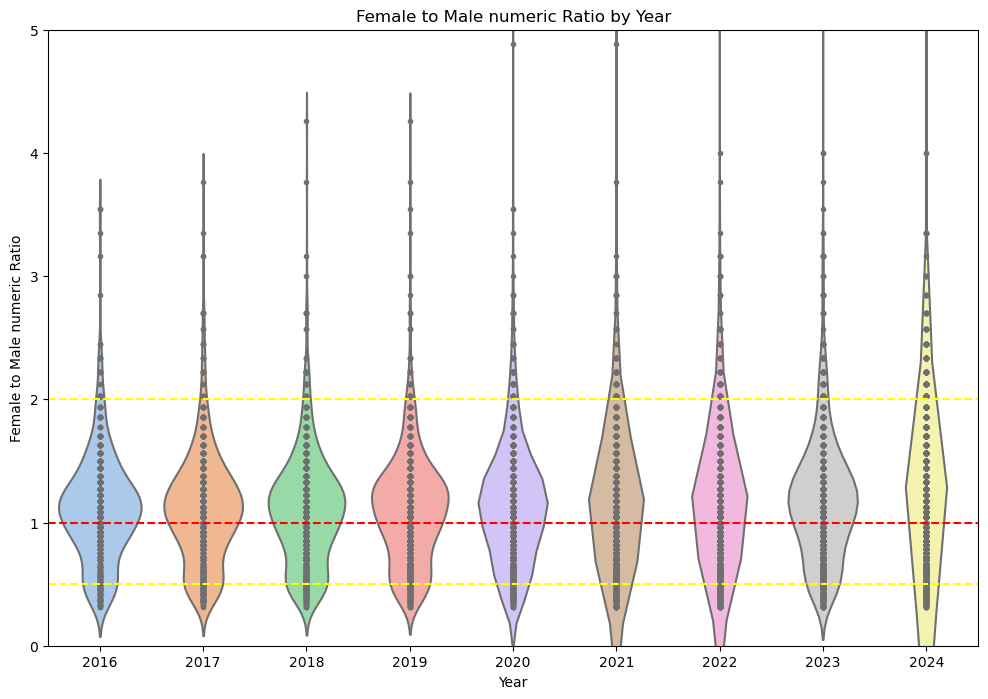

In [27]:
sns.set_palette("pastel")

filtered_data = data[data['Female to Male numeric Ratio'] != -1]

plt.figure(figsize=(12, 8))
sns.violinplot(x='Year', y='Female to Male numeric Ratio', data=filtered_data, inner='point')
plt.axhline(y=1, color='red', linestyle='--')
plt.axhline(y=0.5, color='yellow', linestyle='--')
plt.axhline(y=2, color='yellow', linestyle='--')
plt.title('Female to Male numeric Ratio by Year')
plt.xlabel('Year')
plt.ylabel('Female to Male numeric Ratio')
plt.ylim(0, 5)
plt.show()

It can be observed that over the years, the female-to-male ratio in universities has increased. 

- In 2016, there are some outliers with a high female ratio, but most data points converge towards 1. 
- In contrast, by 2024, the proportion of men is relatively narrow, while the proportion of women extends to higher numbers. 

This trend can be attributed to the #MeToo movement, which has been active globally since 2017 and has led many women to attain key positions in industry.

For more information about the 
[organization](https://he.wikipedia.org/wiki/Me_Too)<br>


We will examine whether the increasing percentage of women impacts the rise in university scores. <br>

According to the heatmap correlation, there is a strong relationship between the final score of the university and research quality.Therefore, we will investigate whether research quality increases as the female-to-male ratio rises.

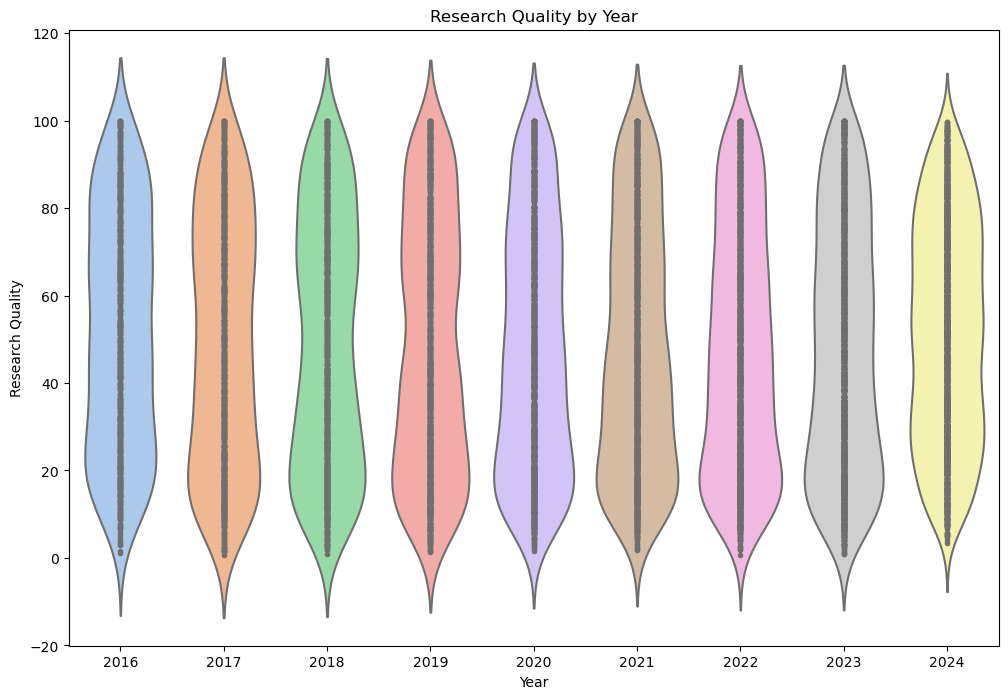

In [28]:
sns.set_palette("pastel")

plt.figure(figsize=(12, 8))
sns.violinplot(x='Year', y='Research Quality', data=filtered_data, inner='point')
plt.title('Research Quality by Year')
plt.xlabel('Year')
plt.ylabel('Research Quality')
plt.show()

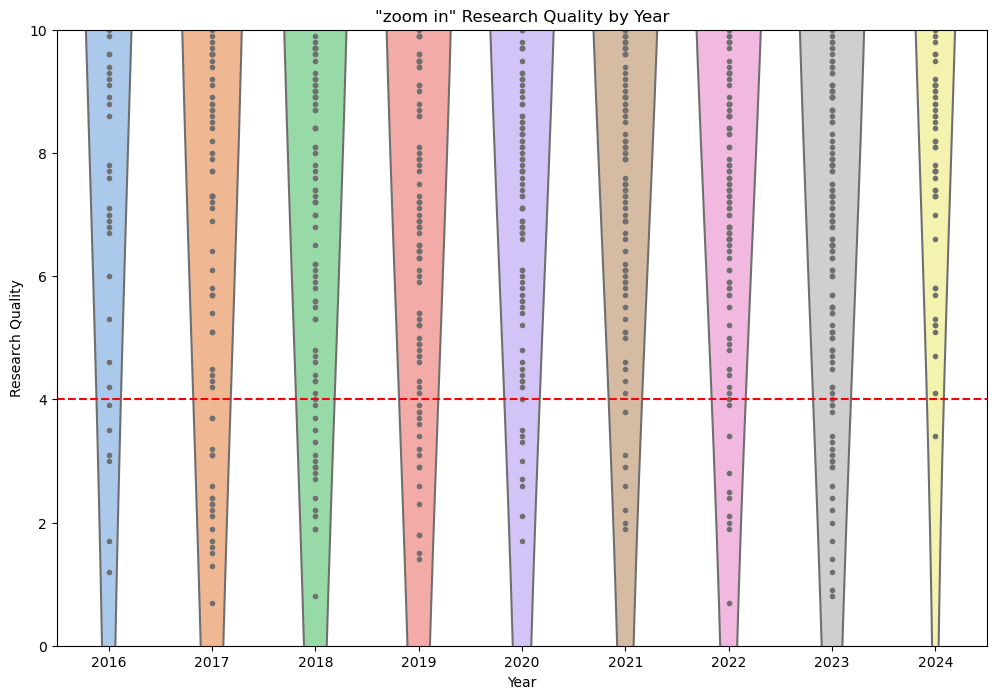

In [29]:
sns.set_palette("pastel")

plt.figure(figsize=(12, 8))
sns.violinplot(x='Year', y='Research Quality', data=filtered_data, inner='point')
plt.title('"zoom in" Research Quality by Year')
plt.xlabel('Year')
plt.ylabel('Research Quality')
plt.axhline(y=4, color='red', linestyle='--')
plt.ylim(0, 10)  # Set the y-axis limit to 0-20
plt.show()

It can be observed that the level of research quality has remained relatively stable between 80-100 over the years. 

- In 2024, the area approaching 0 is "wider," indicating that fewer universities are at a low level of research.
- The decrease in the number of universities with low research quality has been consistent from 2017 to 2022, since the start of the #MeToo movement.

The graph above shows that in 2023, the female-to-male ratio is low, with many universities around the ratio of 1. In the graph here, there is an increase in the number of universities with low research quality in 2023 accordingly. 

The sharp increase in the female-to-male ratio in 2024 is also evident here, with only one university below the red line. 

Therefore, it can be concluded that there is a relationship between the female-to-male ratio at a university and the number of universities with low research quality.

#### Conclusion:

- Over the past few years, there has been a significant increase in the percentage of women in universities worldwide.
- There is a correlation between the female-to-male ratio and lower research quality.

Therefore, we would recommend universities to consider increasing the female student population to avoid low research quality.


<a id="7"> </a> 
###  7.Conclusion 2: Ivy League

<a id='top'></a>

<div>
<img src="https://github.com/ShaniLandau/Ivy-League/blob/main/%D7%A6%D7%99%D7%9C%D7%95%D7%9D%20%D7%9E%D7%A1%D7%9A%202024-08-21%20235830.png?raw=true" width="800"/>
</div>



We want to determine whether Ivy League universities still rank highly today and identify which of these universities are leading in the rankings.

In [30]:
us_data = data[data['Country'] == 'United States'] 
lowest_10_ranks_us = us_data.groupby('Year').apply(lambda x: x.nsmallest(10, 'Rank')).reset_index(drop=True)# Group the filtered data by 'Year' and get the lowest 10 ranks for each group
lowest_10_ranks_us['US Rank'] = lowest_10_ranks_us.groupby('Year').cumcount() + 1 # Add a new column "US Rank" with the serial number of the line for each year
lowest_10_ranks_us

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year,Female Ratio,Male Ratio,Female to Male numeric Ratio,US Rank
0,1,California Institute of Technology,United States,2243,6.9,26.0,33 : 67,95.2000,95.6,97.6,99.8,97.8,64.0,2016,33.0,67.0,0.492537,1
1,3,Stanford University,United States,15596,7.8,22.0,42:58,93.9000,92.5,96.2,99.9,63.3,76.3,2016,42.0,58.0,0.724138,2
2,5,Massachusetts Institute of Technology,United States,11074,9.0,33.0,37 : 63,92.0000,89.4,88.6,99.7,95.4,84.0,2016,37.0,63.0,0.587302,3
3,6,Harvard University,United States,20152,8.9,25.0,-3:-3,91.6000,83.6,99.0,99.8,45.2,77.2,2016,-3.0,-3.0,-1.000000,4
4,7,Princeton University,United States,7929,8.4,27.0,45:55,90.1000,85.1,91.9,99.3,52.1,78.5,2016,45.0,55.0,0.818182,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,9,"University of California, Berkeley",United States,39991,17.9,22.0,52:48,94.5620,87.2,98.8,99.0,99.4,86.8,2024,52.0,48.0,1.083333,6
86,10,Yale University,United States,11924,5.2,21.0,51:49,94.2010,94.0,94.9,97.7,86.5,82.4,2024,51.0,49.0,1.040816,7
87,13,The University of Chicago,United States,15792,6.2,36.0,47:53,92.0845,89.6,91.2,97.6,93.8,82.3,2024,47.0,53.0,0.886792,8
88,15,Johns Hopkins University,United States,15772,4.1,28.0,56:44,91.1400,84.4,92.3,97.2,100.0,84.2,2024,56.0,44.0,1.272727,9


In [31]:
include_names = ['Brown University', 'Harvard University', 'Yale University', 'University of Pennsylvania', 'Columbia University', 'Dartmouth College', 'Princeton University', 'Cornell University'] # List of university names to keep
filtered_data = lowest_10_ranks_us[lowest_10_ranks_us['Name'].isin(include_names)] # Filter the DataFrame
filtered_data[['Rank', 'Name', 'Year', 'US Rank']].head() # Display the filtered DataFrame

,Rank,Name,Year,US Rank
3,6,Harvard University,2016,4
4,7,Princeton University,2016,5
7,12,Yale University,2016,8
9,15,Columbia University,2016,10
13,6,Harvard University,2017,4


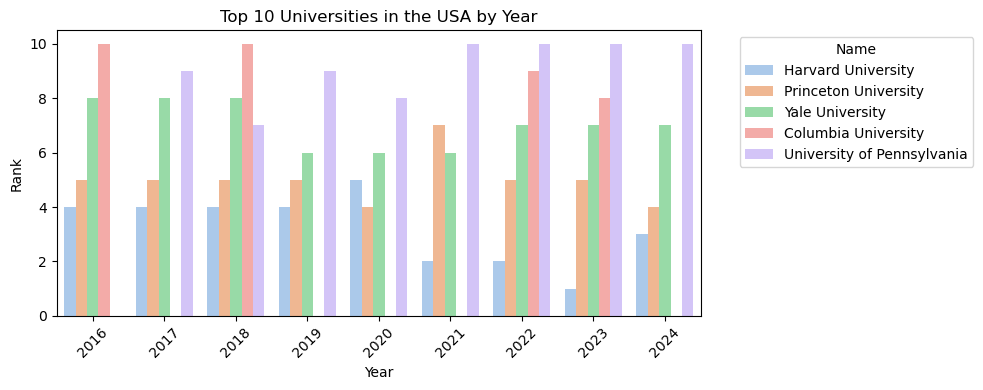

In [32]:
sns.set_palette("pastel")
plt.figure(figsize=(10, 4)) 
sns.barplot(x='Year', y='US Rank', hue='Name', data=filtered_data)  
plt.xlabel('Year') 
plt.ylabel('Rank')
plt.title('Top 10 Universities in the USA by Year')
plt.xticks(rotation=45)  
plt.legend(title='Name', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

It can be observed that some Ivy League universities did not make it into the top 10 universities in the United States in recent years. 

- There are universities that have reached the top only in some of the years.
- Harvard, Princeton, and Yale have consistently been in the list throughout all the years.
- Among these, Harvard and Princeton are almost always in the top five, sometimes ranking very close to each other. In some years, Harvard surpasses Princeton and vice versa.

We will perform a correlation analysis between the parameters influencing the rankings to determine which university is "better."

In [33]:
harvard_princeton_data = lowest_10_ranks_us[(lowest_10_ranks_us['Name'] == 'Harvard University') | (lowest_10_ranks_us['Name'] == 'Princeton University')]

In [34]:
hp_data = harvard_princeton_data[harvard_princeton_data['Name'].isin(['Harvard University', 'Princeton University'])]
hp_data = hp_data[['Name', 'Student Population', 'Students to Staff Ratio', 'International Students', 'Teaching', 'Research Environment', 'Research Quality', 'Industry Impact', 'International Outlook']]
avg_data = hp_data.groupby('Name').mean().reset_index() 
avg_data

,Name,Student Population,Students to Staff Ratio,International Students,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,Harvard University,20728.666667,9.144444,25.000000,90.666667,98.811111,99.466667,51.588889,79.955556
1,Princeton University,7962.666667,8.022222,23.888889,89.188889,94.044444,99.122222,64.866667,80.655556


<Figure size 2000x1000 with 0 Axes>

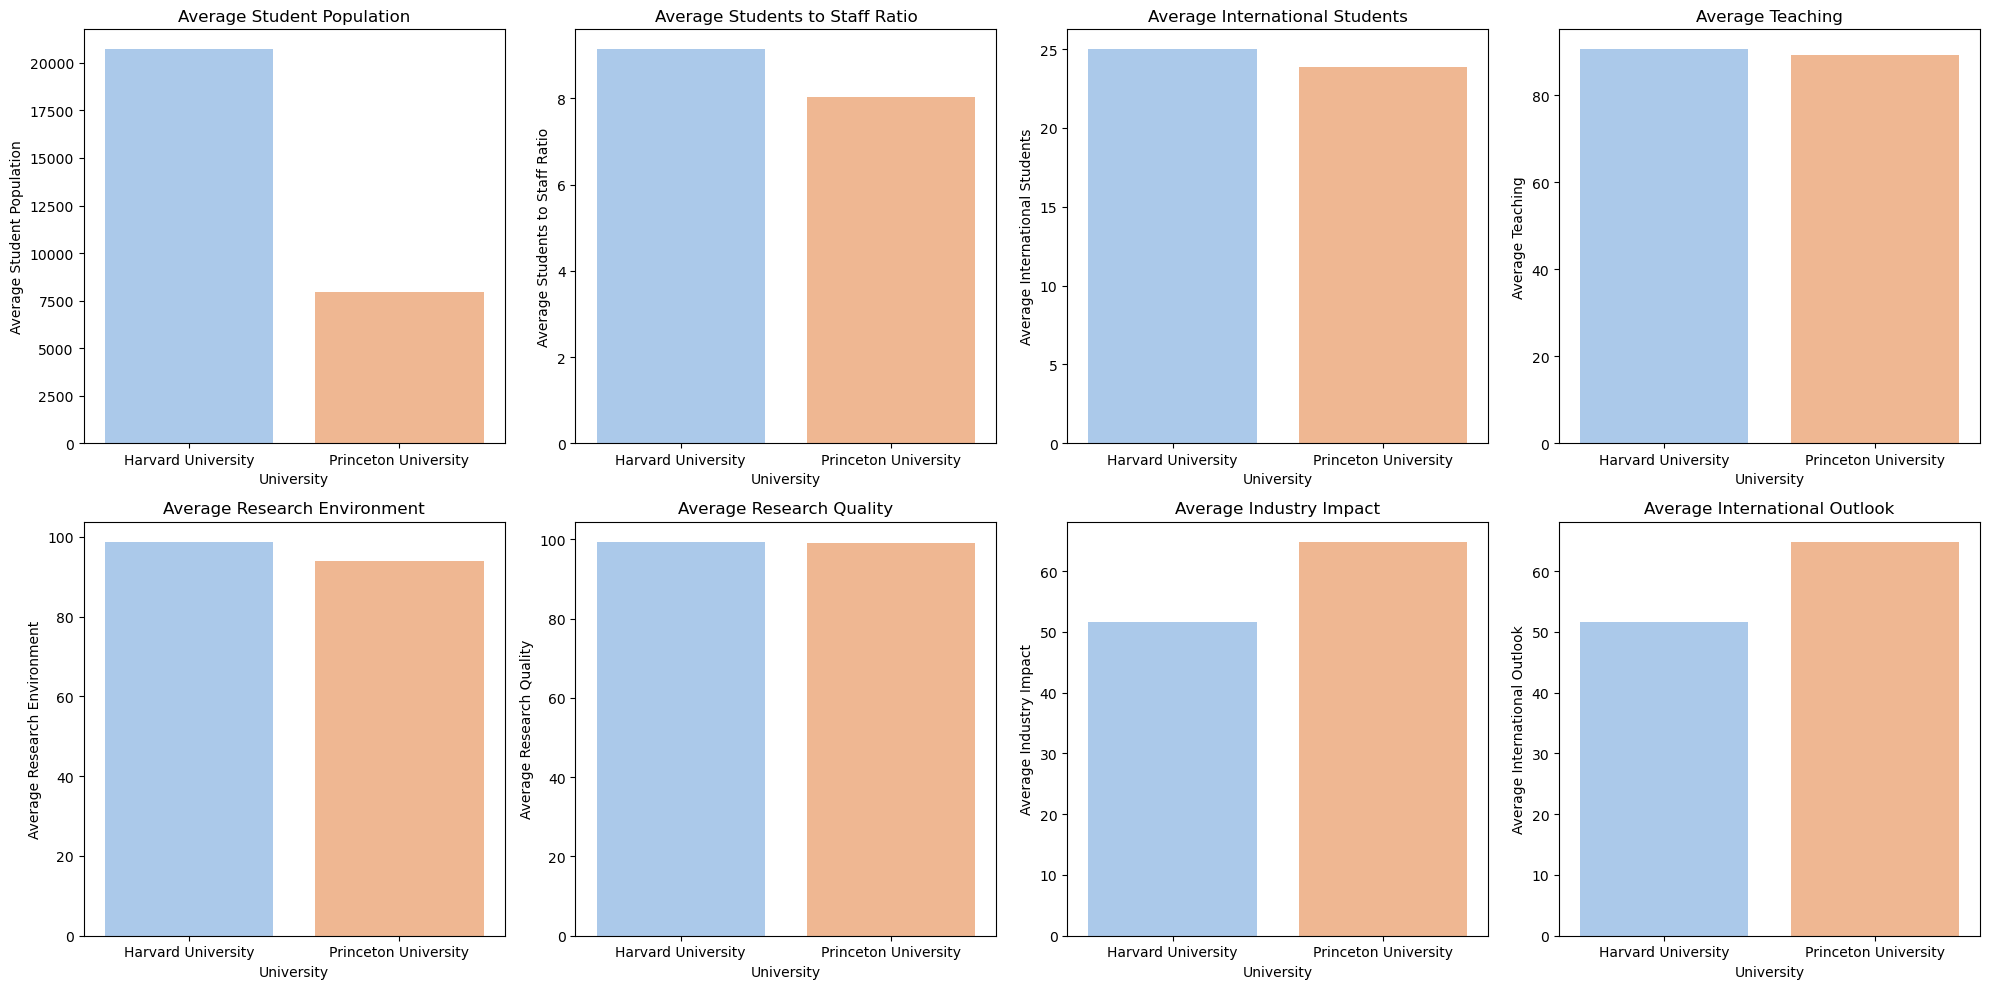

In [35]:
plt.figure(figsize=(20, 10)) 
columns_to_plot = ['Student Population', 'Students to Staff Ratio', 'International Students', 'Teaching', 'Research Environment', 'Research Quality', 'Industry Impact', 'International Outlook']
fig, axs = plt.subplots(2, 4, figsize=(20, 10)) 
axs = axs.flatten()
sns.set_palette("pastel")
sns.barplot(x='Name', y='Student Population', data=avg_data, ax=axs[0])
axs[0].set_xlabel('University')
axs[0].set_ylabel('Average ' + 'Student Population')
axs[0].set_title('Average ' + 'Student Population')
sns.barplot(x='Name', y='Students to Staff Ratio', data=avg_data, ax=axs[1])
axs[1].set_xlabel('University')
axs[1].set_ylabel('Average ' + 'Students to Staff Ratio')
axs[1].set_title('Average ' + 'Students to Staff Ratio')
sns.barplot(x='Name', y='International Students', data=avg_data, ax=axs[2])
axs[2].set_xlabel('University')
axs[2].set_ylabel('Average ' + 'International Students')
axs[2].set_title('Average ' + 'International Students')
sns.barplot(x='Name', y='Teaching', data=avg_data, ax=axs[3])
axs[3].set_xlabel('University')
axs[3].set_ylabel('Average ' + 'Teaching')
axs[3].set_title('Average ' + 'Teaching')
sns.barplot(x='Name', y='Research Environment', data=avg_data, ax=axs[4])
axs[4].set_xlabel('University')
axs[4].set_ylabel('Average ' + 'Research Environment')
axs[4].set_title('Average ' + 'Research Environment')
sns.barplot(x='Name', y='Research Quality', data=avg_data, ax=axs[5])
axs[5].set_xlabel('University')
axs[5].set_ylabel('Average ' + 'Research Quality')
axs[5].set_title('Average ' + 'Research Quality')
sns.barplot(x='Name', y='Industry Impact', data=avg_data, ax=axs[6])
axs[6].set_xlabel('University')
axs[6].set_ylabel('Average ' + 'Industry Impact')
axs[6].set_title('Average ' + 'Industry Impact')
sns.barplot(x='Name', y='Industry Impact', data=avg_data, ax=axs[7])
axs[7].set_xlabel('University')
axs[7].set_ylabel('Average ' + 'International Outlook')
axs[7].set_title('Average ' + 'International Outlook')

plt.tight_layout() # Adjust the layout
plt.show()

It can be observed that there is a small difference between the two universities in most areas.

- The significant difference is that Harvard has, on average, a larger number of students.
- The average research impact of Princeton University is higher, indicating that research conducted at Princeton often has a greater influence on industry innovations, inventions, and consulting.
- Additionally, Princeton surpasses Harvard in attracting students and faculty from around the world.

Therefore, if we had to choose between the two universities, we would select Princeton.

We will examine the acceptance chances for international students applying to one of the Ivy League universities.

In [36]:
selected_universities = ['Brown University','Harvard University','Yale University','University of Pennsylvania','Columbia University','Dartmouth College','Princeton University','Cornell University']
ivy_league = data[data['Name'].isin(selected_universities)]

In [37]:
ivy_league_international_students_avg = ivy_league.groupby('Name')['International Students'].mean().reset_index() # Group by 'Name' and calculate the mean for 'International Students'
ivy_league_international_students_avg # Display the new DataFrame

,Name,International Students
0,Brown University,20.000000
1,Columbia University,34.555556
2,Cornell University,23.555556
3,Dartmouth College,15.222222
4,Harvard University,25.000000
5,Princeton University,23.888889
6,University of Pennsylvania,21.000000
7,Yale University,20.555556


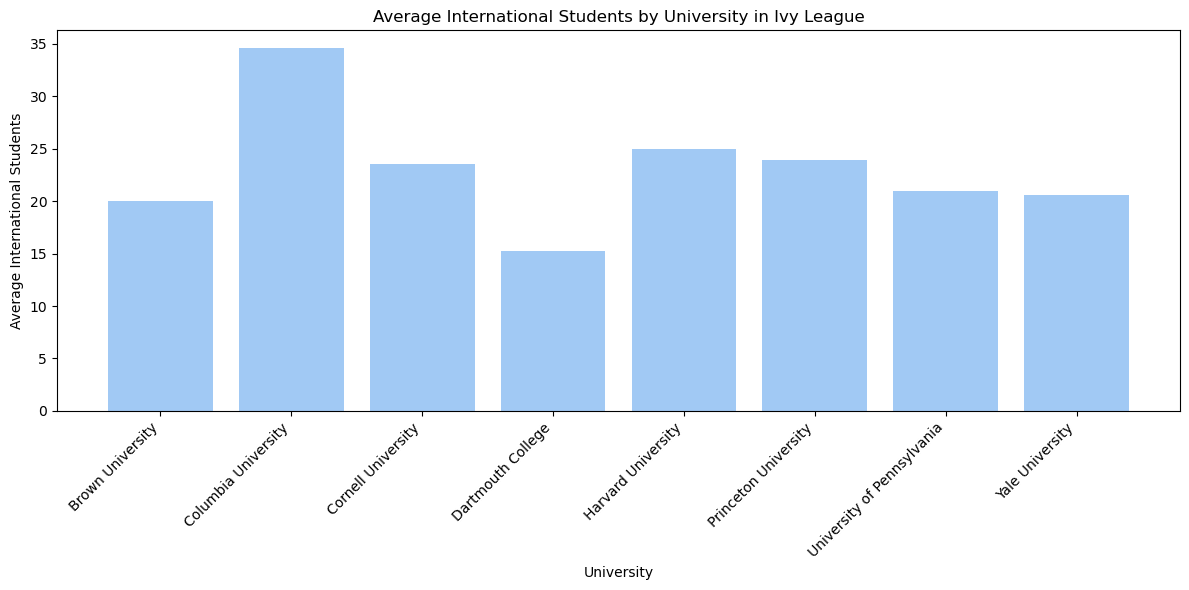

In [38]:
sns.set_palette("pastel")
plt.figure(figsize=(12, 6)) 
plt.bar(ivy_league_international_students_avg['Name'], ivy_league_international_students_avg['International Students']) 
plt.xlabel('University') 
plt.ylabel('Average International Students')
plt.title('Average International Students by University in Ivy League')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

The admissions process for Ivy League universities is long and arduous. Students aiming to study at such prestigious institutions should focus on one or two universities to avoid confusion and frustration. 

- According to the graphs, Harvard University and Columbia University have a broad policy for accepting international students.
- Princeton University and Cornell University follow closely behind in terms of acceptance chances.

If we had to choose two universities based on their international admissions policies, we would select Harvard University and Columbia University.

#### Conclusion:

- Based on the analysis of top-ranked universities, students should consider choosing Harvard or Princeton.
- If the student considers their chances of acceptance as an international student, they should opt for Harvard or Columbia.

If we had to choose two universities to apply to, we would first submit an application to Harvard, which ranks highly among universities and has a broad international admissions policy. The second university would be Princeton, which excels in learning and research but lags slightly behind Harvard in terms of international student acceptance.

<a id="8"> </a> 
### Conclusion 3: Universities in Israel


We will split the data into two datasets: one for Israel and one for the rest of the countries.

In [39]:
israel_data = data[data['Country'] == 'Israel']
other_data = data[data['Country'] != 'Israel']
israel_data

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year,Female Ratio,Male Ratio,Female to Male numeric Ratio
177,178,Hebrew University of Jerusalem,Israel,17612,10.7,5.0,55:45,50.5000,45.8,41.4,64.6,31.9,55.6,2016,55.0,45.0,1.222222
220,221,Tel Aviv University,Israel,23977,24.4,4.0,-3:-3,46.8450,41.0,50.5,49.2,42.9,47.5,2016,-3.0,-3.0,-1.000000
284,285,Technion Israel Institute of Technology,Israel,13855,19.4,4.0,35 : 65,41.9750,33.0,36.1,52.1,38.9,61.9,2016,35.0,65.0,0.538462
485,486,Bar-Ilan University,Israel,17503,16.0,5.0,59:41,30.2875,22.6,21.3,42.3,28.9,49.4,2016,59.0,41.0,1.439024
514,515,Ben-Gurion University of the Negev,Israel,16695,12.6,2.0,49:51,28.5925,25.8,23.1,30.1,37.0,52.9,2016,49.0,51.0,0.960784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11120,595,Ben-Gurion University of the Negev,Israel,17265,21.3,2.0,52:48,42.0850,34.1,30.6,59.0,71.6,34.5,2024,52.0,48.0,1.083333
11126,601,Bar-Ilan University,Israel,19599,19.0,4.0,61:39,41.9110,30.0,34.1,54.1,85.8,46.8,2024,61.0,39.0,1.564103
11143,618,University of Haifa,Israel,17353,18.4,3.0,66:34,41.4670,23.9,30.1,68.4,64.5,34.5,2024,66.0,34.0,1.941176
11465,940,Reichman University,Israel,8585,35.0,28.0,52:48,33.9945,13.1,16.6,64.3,31.4,63.6,2024,52.0,48.0,1.083333


In [40]:
other_data

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year,Female Ratio,Male Ratio,Female to Male numeric Ratio
0,1,California Institute of Technology,United States,2243,6.9,26.0,33 : 67,95.2000,95.6,97.6,99.8,97.8,64.0,2016,33.0,67.0,0.492537
1,2,University of Oxford,United Kingdom,19920,11.6,34.0,46:54,94.2000,86.5,98.9,98.8,73.1,94.4,2016,46.0,54.0,0.851852
2,3,Stanford University,United States,15596,7.8,22.0,42:58,93.9000,92.5,96.2,99.9,63.3,76.3,2016,42.0,58.0,0.724138
3,4,University of Cambridge,United Kingdom,18810,11.8,34.0,46:54,92.8000,88.2,96.7,97.0,55.0,91.5,2016,46.0,54.0,0.851852
4,5,Massachusetts Institute of Technology,United States,11074,9.0,33.0,37 : 63,92.0000,89.4,88.6,99.7,95.4,84.0,2016,37.0,63.0,0.587302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12425,1900,Penza State University,Russian Federation,17934,17.2,12.0,56:44,12.1935,14.3,8.7,7.8,16.3,32.8,2024,56.0,44.0,1.272727
12426,1901,Universidad Peruana de Ciencias Aplicadas (UPC),Peru,56595,21.1,1.0,50:50,12.1470,13.5,8.7,10.1,15.6,26.5,2024,50.0,50.0,1.000000
12427,1902,Universidade Federal Rural do Semi-Arido,Brazil,8687,12.4,0.0,49:51,11.9910,19.1,9.0,5.7,16.6,18.3,2024,49.0,51.0,0.960784
12428,1903,State University of Bahia,Brazil,25067,11.9,0.0,66:34,11.5655,19.3,8.6,4.1,16.2,20.0,2024,66.0,34.0,1.941176


We want to examine how universities in Israel stand in comparison to universities worldwide. To achieve this, we will compare Israeli universities to global universities in terms of:

- Final score
- Faculty ranking
- Research environment
- Research quality
- Impact on industry
- Ability to attract global attention

We have chosen to focus on these aspects because they are the most interesting and significant criteria.

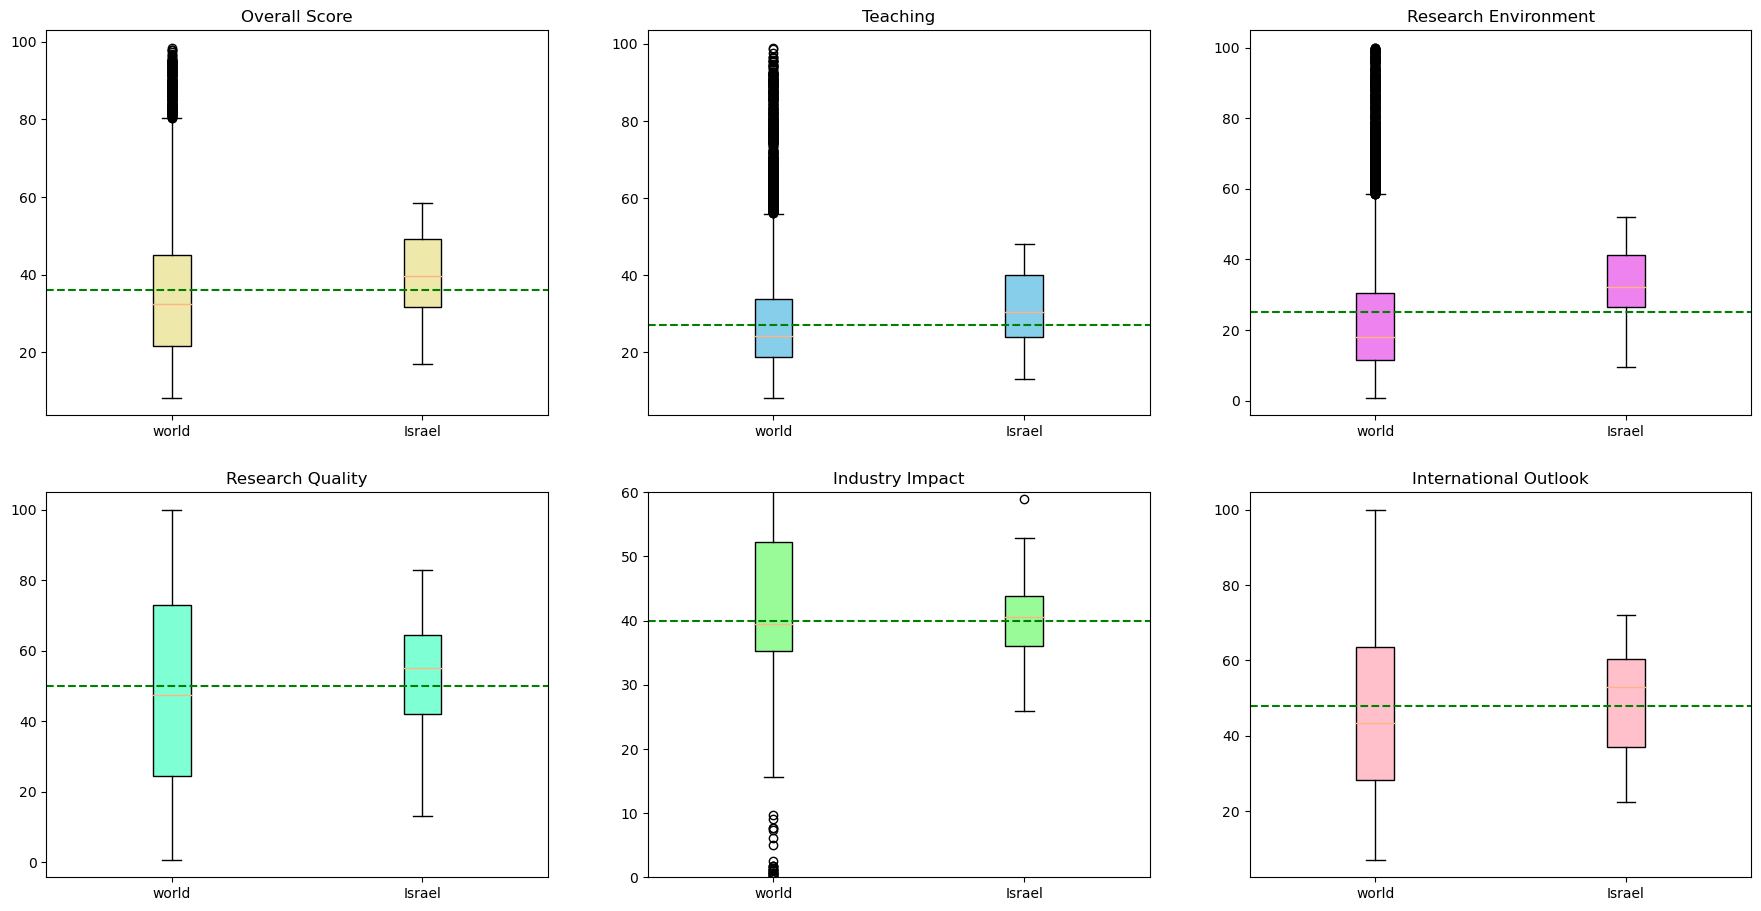

In [41]:
_Lable=['World','Israel']
fig, axes = plt.subplots(2,3,figsize=(22, 11))


axes[0, 0].boxplot([other_data['Overall Score'],israel_data['Overall Score']],patch_artist=True,boxprops=dict(facecolor="palegoldenrod"))
axes[0, 0].set_title('Overall Score')
axes[0, 0].axhline(y=36, color='green', linestyle='--')
axes[0, 1].boxplot([other_data['Teaching'],israel_data['Teaching']],patch_artist=True,boxprops=dict(facecolor="skyblue"))
axes[0, 1].set_title('Teaching')
axes[0, 1].axhline(y=27, color='green', linestyle='--')
axes[0, 2].boxplot([other_data['Research Environment'],israel_data['Research Environment']],patch_artist=True,boxprops=dict(facecolor="violet"))
axes[0, 2].set_title('Research Environment')
axes[0, 2].axhline(y=25, color='green', linestyle='--')
axes[1, 0].boxplot([other_data['Research Quality'],israel_data['Research Quality']],patch_artist=True,boxprops=dict(facecolor="aquamarine"))
axes[1, 0].set_title('Research Quality')
axes[1, 0].axhline(y=50, color='green', linestyle='--')
axes[1, 1].boxplot([other_data['Industry Impact'],israel_data['Industry Impact']],patch_artist=True,boxprops=dict(facecolor="palegreen"))
axes[1, 1].set_title('Industry Impact')
axes[1, 1].set_ylim(0, 60)
axes[1, 1].axhline(y=40, color='green', linestyle='--')
axes[1, 2].boxplot([other_data['International Outlook'],israel_data['International Outlook']],patch_artist=True,boxprops=dict(facecolor="pink"))
axes[1, 2].set_title('International Outlook')
axes[1, 2].axhline(y=48, color='green', linestyle='--')

plt.setp(axes, xticks=[1, 2],  xticklabels=['world', 'Israel'])
plt.show()


It can be observed that the median values for universities in Israel are higher in all categories compared to the median values for universities worldwide. This positions Israel positively on the global stage, with significant opportunities for advancement.

Israel, one of the smallest countries in the world, is known as the high-tech powerhouse of the Middle East. These graphs support this claim and demonstrate that, despite our small size, we are not falling behind.

We want to compare between the different universities within Israel.

In [42]:
israel_data = data[data['Country'] == 'Israel']
israel_data.head()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year,Female Ratio,Male Ratio,Female to Male numeric Ratio
177,178,Hebrew University of Jerusalem,Israel,17612,10.7,5.0,55:45,50.5000,45.8,41.4,64.6,31.9,55.6,2016,55.0,45.0,1.222222
220,221,Tel Aviv University,Israel,23977,24.4,4.0,-3:-3,46.8450,41.0,50.5,49.2,42.9,47.5,2016,-3.0,-3.0,-1.000000
284,285,Technion Israel Institute of Technology,Israel,13855,19.4,4.0,35 : 65,41.9750,33.0,36.1,52.1,38.9,61.9,2016,35.0,65.0,0.538462
485,486,Bar-Ilan University,Israel,17503,16.0,5.0,59:41,30.2875,22.6,21.3,42.3,28.9,49.4,2016,59.0,41.0,1.439024
514,515,Ben-Gurion University of the Negev,Israel,16695,12.6,2.0,49:51,28.5925,25.8,23.1,30.1,37.0,52.9,2016,49.0,51.0,0.960784


We will examine the scores assigned to universities in Israel.

<Figure size 640x480 with 0 Axes>

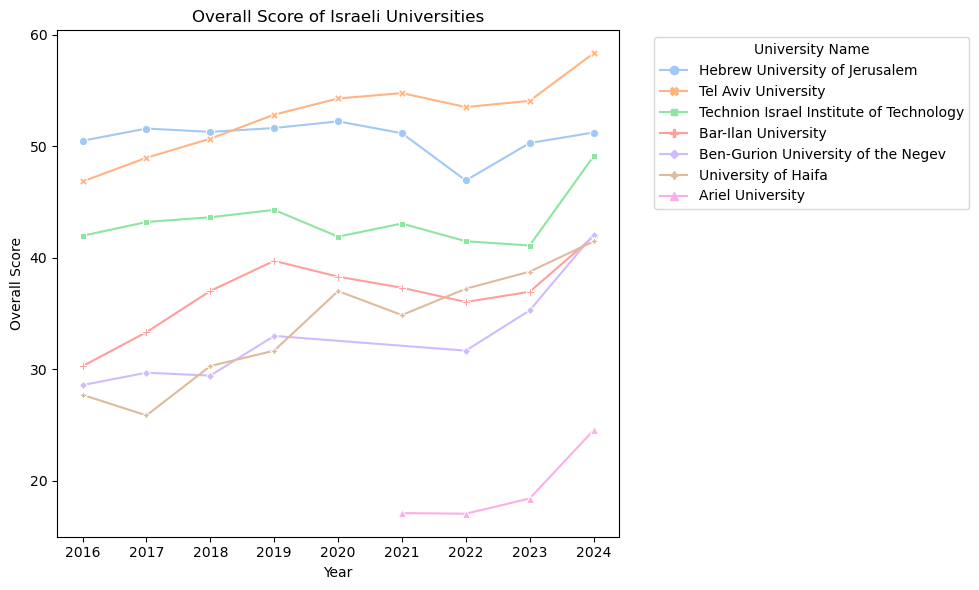

In [43]:
israeli_universities = ['Hebrew University of Jerusalem','Tel Aviv University','Technion Israel Institute of Technology','Bar-Ilan University','Ben-Gurion University of the Negev','University of Haifa','Ariel University']
israeli_universities_data = data[data['Name'].isin(israeli_universities)]
sns.set_palette("pastel")
plt.tight_layout() 
plt.show()
plt.figure(figsize=(10,6))
sns.lineplot(data=israeli_universities_data, x='Year', y='Overall Score', hue='Name', style='Name', markers=True, dashes=False)
plt.title('Overall Score of Israeli Universities')
plt.xlabel('Year')
plt.ylabel('Overall Score')
plt.legend(title='University Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

We will focus on Ariel University, where we study. It appears that there is a sharp increase in scores between 2023 and 2024. We will investigate the reasons for this increase.

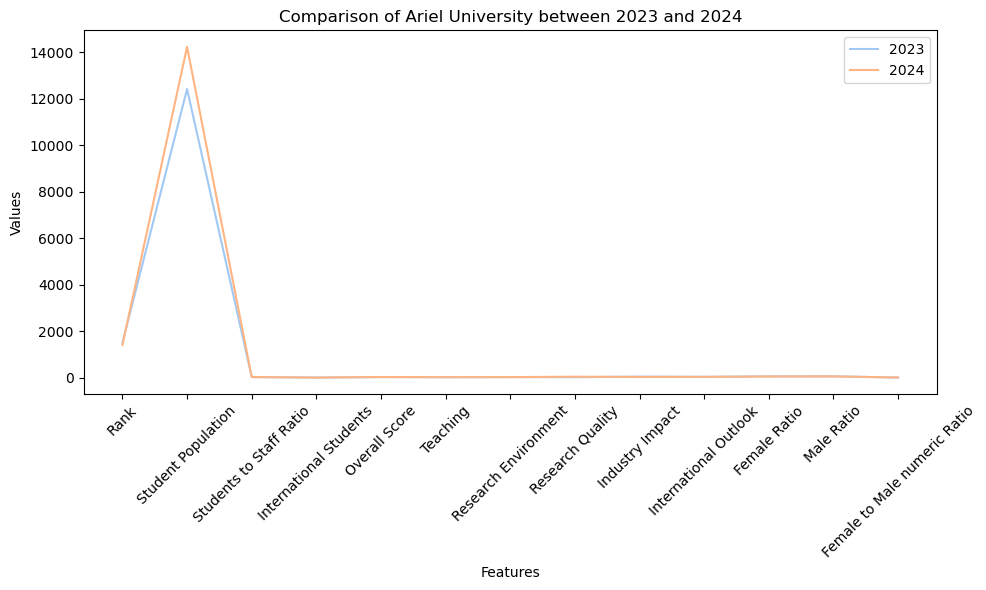

In [44]:
ariel_data_2023 = data[(data['Name'] == 'Ariel University') & (data['Year'] == 2023)]
ariel_data_2024 = data[(data['Name'] == 'Ariel University') & (data['Year'] == 2024)]
ariel_data_2023 = ariel_data_2023.drop(columns=['Name', 'Country', 'Year', 'Female to Male Ratio']).squeeze()
ariel_data_2024 = ariel_data_2024.drop(columns=['Name', 'Country', 'Year', 'Female to Male Ratio']).squeeze()
sns.set_palette("pastel")
plt.figure(figsize=(10, 6))
sns.lineplot(data=ariel_data_2023, label='2023')
sns.lineplot(data=ariel_data_2024, label='2024')
plt.title('Comparison of Ariel University between 2023 and 2024')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

It can be seen that the only data point that changed is the number of students enrolled at the university. We will compare the data from previous years to try to understand the reason for the increase.

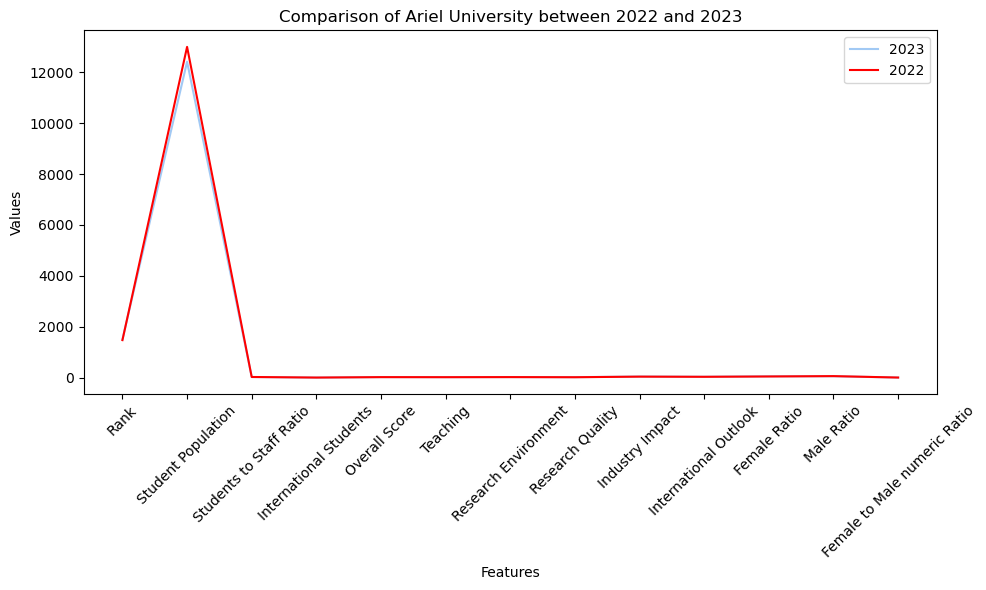

In [45]:
ariel_data_2022 = data[(data['Name'] == 'Ariel University') & (data['Year'] == 2022)]
ariel_data_2023 = data[(data['Name'] == 'Ariel University') & (data['Year'] == 2023)]
ariel_data_2022 = ariel_data_2022.drop(columns=['Name', 'Country', 'Year', 'Female to Male Ratio']) 
ariel_data_2022 = ariel_data_2022.squeeze() 
ariel_data_2023 = ariel_data_2023.drop(columns=['Name', 'Country', 'Year', 'Female to Male Ratio'])  
ariel_data_2023 = ariel_data_2023.squeeze()  
plt.figure(figsize=(10, 6))
sns.lineplot(data=ariel_data_2023, label='2023')
sns.lineplot(data=ariel_data_2022, label='2022', color='red')  #
plt.title('Comparison of Ariel University between 2022 and 2023')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend() 
plt.tight_layout()
plt.show()


It can be observed that all the data for Ariel University between 2022 and 2023 are very similar, with no significant changes. This impressive stability may attract students to choose Ariel.

We will investigate whether different variables changed in other universities in Israel during these years, causing a decline in their rankings and leading to a preference for Ariel University over others.

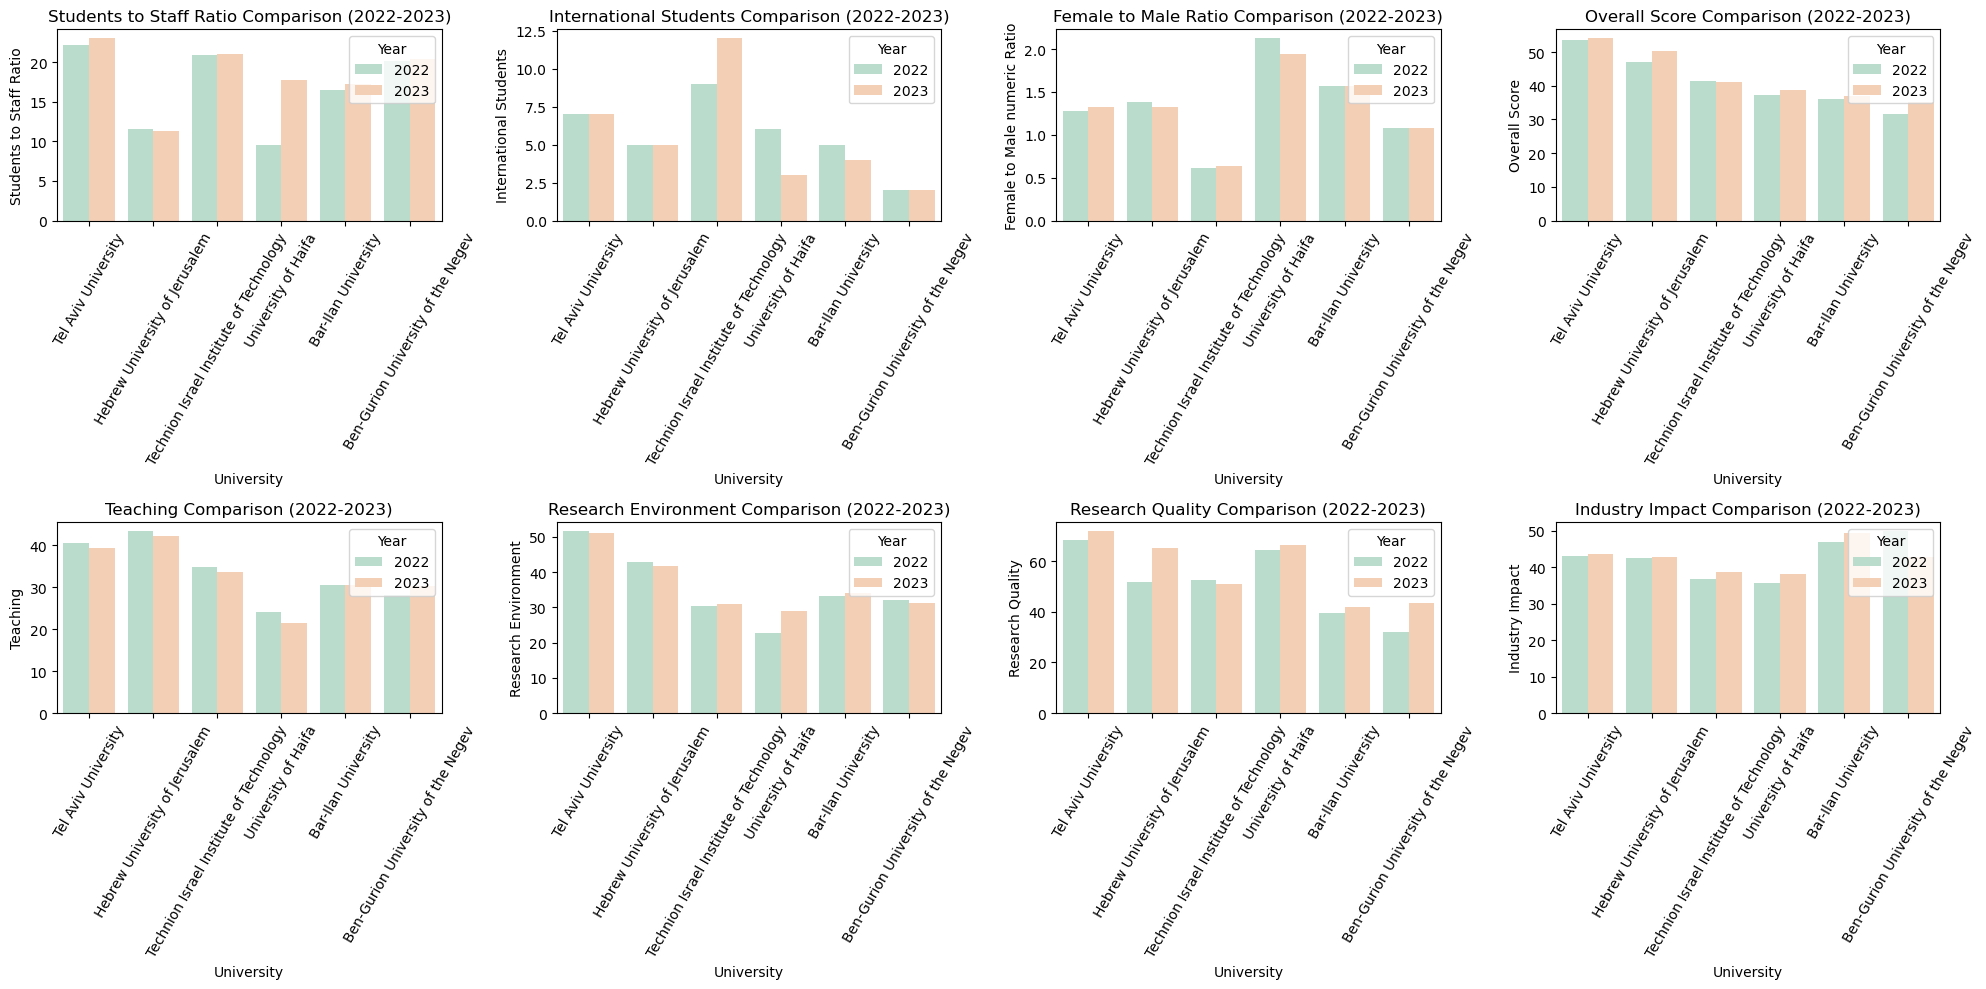

In [46]:
universities_data_2022 = data[(data['Year'] == 2022) & data['Name'].isin(["Hebrew University of Jerusalem", "Tel Aviv University", "Technion Israel Institute of Technology", "Bar-Ilan University", "Ben-Gurion University of the Negev", "University of Haifa"])]
universities_data_2023 = data[(data['Year'] == 2023) & data['Name'].isin(["Hebrew University of Jerusalem", "Tel Aviv University", "Technion Israel Institute of Technology", "Bar-Ilan University", "Ben-Gurion University of the Negev", "University of Haifa"])]
metrics = ["Students to Staff Ratio", "International Students", "Female to Male Ratio numeric", "Overall Score", "Teaching", "Research Environment", "Research Quality", "Industry Impact", "International Outlook"]
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
custom_palette = sns.color_palette("pastel")
sns.set_palette(custom_palette)
sns.barplot(data=pd.concat([universities_data_2022, universities_data_2023]), x='Name', y='Students to Staff Ratio', hue='Year', palette="Pastel2", ax=axes[0, 0])
axes[0, 0].set_title('Students to Staff Ratio Comparison (2022-2023)')
axes[0, 0].set_xlabel('University')
axes[0, 0].set_ylabel('Students to Staff Ratio')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=60)
axes[0, 0].legend(title='Year', loc='upper right')
sns.barplot(data=pd.concat([universities_data_2022, universities_data_2023]), x='Name', y='International Students', hue='Year', palette="Pastel2", ax=axes[0, 1])
axes[0, 1].set_title('International Students Comparison (2022-2023)')
axes[0, 1].set_xlabel('University')
axes[0, 1].set_ylabel('International Students')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=60)
axes[0, 1].legend(title='Year', loc='upper right')
sns.barplot(data=pd.concat([universities_data_2022, universities_data_2023]), x='Name', y='Female to Male numeric Ratio', hue='Year', palette="Pastel2", ax=axes[0, 2])
axes[0, 2].set_title('Female to Male Ratio Comparison (2022-2023)')
axes[0, 2].set_xlabel('University')
axes[0, 2].set_ylabel('Female to Male numeric Ratio')
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=60)
axes[0, 2].legend(title='Year', loc='upper right')
sns.barplot(data=pd.concat([universities_data_2022, universities_data_2023]), x='Name', y='Overall Score', hue='Year', palette="Pastel2", ax=axes[0, 3])
axes[0, 3].set_title('Overall Score Comparison (2022-2023)')
axes[0, 3].set_xlabel('University')
axes[0, 3].set_ylabel('Overall Score')
axes[0, 3].set_xticklabels(axes[0, 3].get_xticklabels(), rotation=60)
axes[0, 3].legend(title='Year', loc='upper right')
sns.barplot(data=pd.concat([universities_data_2022, universities_data_2023]), x='Name', y='Teaching', hue='Year', palette="Pastel2", ax=axes[1, 0])
axes[1, 0].set_title('Teaching Comparison (2022-2023)')
axes[1, 0].set_xlabel('University')
axes[1, 0].set_ylabel('Teaching')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=60)
axes[1, 0].legend(title='Year', loc='upper right')
sns.barplot(data=pd.concat([universities_data_2022, universities_data_2023]), x='Name', y='Research Environment', hue='Year', palette="Pastel2", ax=axes[1, 1])
axes[1, 1].set_title('Research Environment Comparison (2022-2023)')
axes[1, 1].set_xlabel('University')
axes[1, 1].set_ylabel('Research Environment')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=60)
axes[1, 1].legend(title='Year', loc='upper right')
sns.barplot(data=pd.concat([universities_data_2022, universities_data_2023]), x='Name', y='Research Quality', hue='Year', palette="Pastel2", ax=axes[1, 2])
axes[1, 2].set_title('Research Quality Comparison (2022-2023)')
axes[1, 2].set_xlabel('University')
axes[1, 2].set_ylabel('Research Quality')
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=60)
axes[1, 2].legend(title='Year', loc='upper right')
sns.barplot(data=pd.concat([universities_data_2022, universities_data_2023]), x='Name', y='Industry Impact', hue='Year', palette="Pastel2", ax=axes[1, 3])
axes[1, 3].set_title('Industry Impact Comparison (2022-2023)')
axes[1, 3].set_xlabel('University')
axes[1, 3].set_ylabel('Industry Impact')
axes[1, 3].set_xticklabels(axes[1, 3].get_xticklabels(), rotation=60)
axes[1, 3].legend(title='Year', loc='upper right')
plt.tight_layout() 
plt.show()

 It can be observed that at all universities, the overall score, research quality, and contribution to industry increased between 2022 and 2023, with minimal changes in other categories.

This trend is unlikely to cause people to avoid one university in favor of another. Therefore, we cannot identify a strong connection between the increase in students at Ariel University and a decline in other universities.

#### Conclusion:

- Universities in Israel are at a high level compared to universities worldwide.
- Ariel University, which we focused on, is relatively lower in ranking compared to other Israeli universities. This can be explained by the fact that Ariel recently transitioned from a college to a university. The university's growth rate is rapid, and we anticipate that in the coming years, it will rise in rankings and potentially surpass some of the other Israeli universities.
  
  This is based on the significant increase in the number of students enrolled in 2024. 

- This increase is not due to a decline in data from other universities in Israel. The rise is likely related to external factors at Ariel University that are not captured in our dataset.

## In summary, this project provides a comprehensive analysis of university rankings, focusing on key metrics and trends both globally and within Israel. 
## We observed significant patterns and insights, particularly regarding the rise of Ariel University. 
## Thank you for taking the time to review this project.